In [1]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer


# import data from csv
df = pd.read_csv('/Users/Spence604/Library/CloudStorage/OneDrive-WesternGovernorsUniversity/Churn Files D212/churn_clean.csv')

# set it so we can see all columns
pd.set_option('display.max_columns', None)

df = df.rename(columns=({ 'Item1': 'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 
                         'Item4':'Reliability', 'Item5':'Options', 'Item6':'Respectful_Response',
                         'Item7':'Courteous_Exchange', 'Item8':'Evidence_of_active_listening'}))

df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Evidence_of_active_listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df.duplicated().any()

False

In [3]:
### Population -Children	Age	Income	Marital	Gender	Churn	Contacts	Tenure	Bandwidth_GB_Year

clean_df = df.drop(columns= ["CaseOrder","Interaction", "UID", "City", "State", "Multiple","Phone",
                    "Techie","PaperlessBilling","Yearly_equip_failure","County", "Zip", "Lat", "Lng","MonthlyCharge","Email",
                    "Area", "TimeZone", "Job", "PaymentMethod", "DeviceProtection","OnlineBackup","Reliability",
                    "OnlineBackup","Port_modem","OnlineSecurity","Options",
                    "TechSupport","Contract","Tablet","InternetService", "StreamingTV", "StreamingMovies",
                     "Outage_sec_perweek","Timely_Response", "Timely_Fixes", "Timely_Replacements", "Customer_id",
                      "Respectful_Response",  "Courteous_Exchange", "Evidence_of_active_listening"
                           ])

clean_df

,Population,Children,Age,Income,Marital,Gender,Churn,Contacts,Tenure,Bandwidth_GB_Year
0,38,0,68,28561.99,Widowed,Male,No,0,6.795513,904.536110
1,10446,1,27,21704.77,Married,Female,Yes,0,1.156681,800.982766
2,3735,4,50,9609.57,Widowed,Female,No,0,15.754144,2054.706961
3,13863,1,48,18925.23,Married,Male,No,2,17.087227,2164.579412
4,11352,0,83,40074.19,Separated,Male,Yes,2,1.670972,271.493436
...,...,...,...,...,...,...,...,...,...,...
9995,640,3,23,55723.74,Married,Male,No,2,68.197130,6511.252601
9996,77168,4,48,34129.34,Divorced,Male,No,2,61.040370,5695.951810
9997,406,1,48,45983.43,Never Married,Female,No,0,47.416890,4159.305799
9998,35575,1,39,16667.58,Separated,Male,No,1,71.095600,6468.456752


In [4]:
#dupe check
clean_df.duplicated().any()

False

In [5]:
clean_df.to_csv('Assesment_Clean.csv', index = False)

In [6]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

num_cols = clean_df.columns[clean_df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

scaler = StandardScaler()

clean_df[num_cols] = scaler.fit_transform(clean_df[num_cols])

#converting catergorical values into numerical

# Churn Yes = 1 and No = 0
clean_df['Churn']=df.Churn.map(dict(Yes=1, No=0))

df['Gender'].value_counts()

clean_df['Gender']=df.Gender.map(dict(Female=1, Male=2, Nonbinary=0))

marital_dict = {'Married': 0, 'Divorced': 1, 'Widowed': 2, 'Separated': 3, 'Never Married': 4}
clean_df['Marital'] = clean_df['Marital'].replace(marital_dict)

clean_df

clean_df['Marital'].value_counts()

1    2092
2    2027
3    2014
4    1956
0    1911
Name: Marital, dtype: int64

In [7]:
#export scaled data
clean_df.to_csv('Assement_scaled.csv', index = False)

In [8]:
#analysis

# Setting up and running KMeans

X_train = clean_df.values

# Running KMeans with 10 clusters

kmeans = KMeans(n_clusters=10, random_state=450)
kmeans = kmeans.fit(X_train)

# Print clusters
print("Clusters: ", kmeans.labels_)

# Print inertia
print("Inertia: ", kmeans.inertia_)

no_of_clusters = range(2,15)
inertia = []

Clusters:  [2 4 0 ... 1 1 1]
Inertia:  46470.301883057415


The innertia for : 2 Clusters is: 75731.10147284709
The innertia for : 3 Clusters is: 68240.96288771648
The innertia for : 4 Clusters is: 61080.984034379464
The innertia for : 5 Clusters is: 57341.87285835564
The innertia for : 6 Clusters is: 54304.74442193106
The innertia for : 7 Clusters is: 51824.580755037125
The innertia for : 8 Clusters is: 49912.61863792682
The innertia for : 9 Clusters is: 48120.20500619963
The innertia for : 10 Clusters is: 46470.301883057415
The innertia for : 11 Clusters is: 45079.3456624744
The innertia for : 12 Clusters is: 43657.68810088973
The innertia for : 13 Clusters is: 42444.35052055061
The innertia for : 14 Clusters is: 41458.94803406004


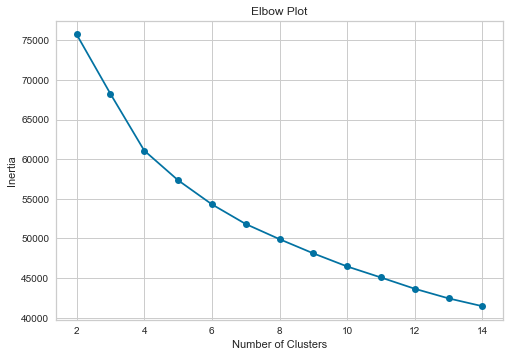

In [9]:
for n in no_of_clusters:
    kmeans = KMeans(n_clusters=n, random_state=450)
    kmeans = kmeans.fit(X_train)
    i = kmeans.inertia_
    inertia.append(i)
    print("The innertia for :", n, "Clusters is:", i)

import matplotlib.pyplot as plt

no_of_clusters = range(2, 15)
inertia = [75731.10147284709, 68240.96288771648, 61080.984034379464, 57341.87285835564, 54304.74442193106, 51824.580755037125, 49912.61863792682, 48120.20500619964,
           46470.301883057415, 45079.3456624744, 43657.68810088973, 42444.35052055061, 41458.94803406004]

plt.plot(no_of_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

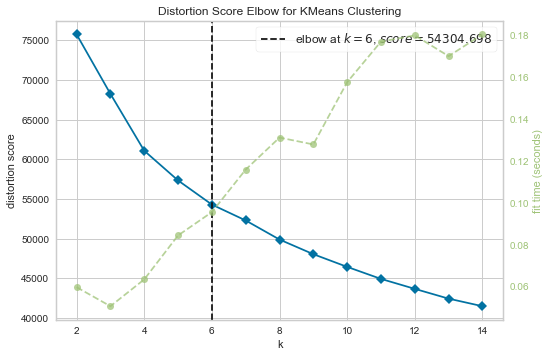

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings= True,figsize=(16,6))
visualizer.fit(clean_df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure